,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000115841.21,398.6378,-2.985281,0.1725690,5.735515e-68,1.717385e-63,RMDN2,protein_coding
2,ENSG00000105607.13,2280.1568,-3.280067,0.1919626,2.853313e-66,4.271837e-62,GCDH,protein_coding
3,ENSG00000042781.14,556.0755,-6.155813,0.3682390,2.088619e-64,2.084651e-60,USH2A,protein_coding
4,ENSG00000179152.20,1242.7958,-2.228718,0.1366391,3.821423e-61,2.860622e-57,TCAIM,protein_coding
5,ENSG00000052802.13,7627.2615,-3.697383,0.2288646,1.763222e-59,1.055923e-55,MSMO1,protein_coding
6,ENSG00000060971.19,6237.0901,-3.751666,0.2368399,2.750267e-57,1.372521e-53,ACAA1,protein_coding


Number of downregulated genes: 2503 


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(down_deg$gene_name, fromType = "SYMBOL", toType = "ENTREZID", :
“2.32% of input gene IDs are fail to map...”


Mapping success rate: 97.68 %
Number of unmapped genes: 58 


,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04610,Organismal Systems,Immune system,hsa04610,Complement and coagulation cascades,54/1300,88/9446,0.6136364,4.458776,13.02185,2.773263e-25,8.939487e-23,6.721419e-23,715/2/716/3818/710/2157/5624/2160/10747/3426/5627/2161/2243/721/725/2159/731/5345/732/3075/717/2266/10878/722/2244/5265/3053/5648/729/629/1361/2147/720/735/2155/7448/1191/718/3078/81494/3827/2165/4153/2158/3080/10877/462/5340/7035/727/733/730/5104/5054,54
hsa04146,Cellular Processes,Transport and catabolism,hsa04146,Peroxisome,52/1300,83/9446,0.6265060,4.552289,12.98495,5.212529e-25,8.939487e-23,6.721419e-23,30/847/3155/6647/26061/51/3295/5264/8309/6342/10901/8800/283927/2180/23417/1962/2053/5194/5195/10455/55825/3417/5825/1384/92960/54677/1891/51179/570/51268/5826/8504/8528/5824/1610/8310/11001/373156/7498/5827/54363/26063/3418/51703/189/83594/6648/23600/54511/4598/196743/23305,52
hsa00280,Metabolism,Amino acid metabolism,hsa00280,"Valine, leucine and isoleucine degradation",38/1300,48/9446,0.7916667,5.752372,13.18602,1.874790e-24,2.143510e-22,1.611662e-22,30/36/4594/3155/3712/4329/3033/1629/26275/84693/18/223/11112/217/1892/34/39/594/10449/1962/38/35/3028/501/27034/5096/316/3157/224/3030/3032/3158/5095/549/64087/219/64902/54511,38
hsa00071,Metabolism,Lipid metabolism,hsa00071,Fatty acid degradation,35/1300,43/9446,0.8139535,5.914311,12.90221,2.269961e-23,1.946492e-21,1.463528e-21,2639/30/36/3033/51/128/223/217/1892/34/2180/39/10449/1962/38/35/10455/501/130/224/1376/33/125/3030/124/37/3032/8310/127/131/126/113612/219/51703/23305,35
hsa01200,Metabolism,Global and overview maps,hsa01200,Carbon metabolism,59/1300,117/9446,0.5042735,3.664129,11.58327,1.790057e-21,1.227979e-19,9.232927e-20,2746/847/4594/2203/4329/26275/8801/84693/51/132158/55902/128/6470/1892/2806/2645/39/26007/38/6390/5162/35/9104/2027/414328/3417/5096/10993/5091/1373/84706/229/2875/51179/2271/48/29968/9563/6472/2747/2653/6392/8310/2098/5631/5095/5313/230/2731/54363/2805/3418/55753/189/64902/26227/8802/3101/113675,59
hsa01240,Metabolism,Global and overview maps,hsa01240,Biosynthesis of cofactors,69/1300,154/9446,0.4480519,3.255614,11.27382,3.591006e-21,2.052858e-19,1.543502e-19,1723/211/10243/4522/50808/53354/6470/125061/217/2990/133686/2643/8564/210/54995/554235/9249/2677/23498/9104/55163/7360/326625/4338/169355/441024/224/54659/51109/7364/2729/205/3242/10941/65220/10327/84274/6999/7365/4143/1719/8836/4337/8630/29968/1371/6472/79646/7363/51004/2235/23475/79001/57026/54657/54658/54600/27235/249/219/7367/5805/2356/7358/7366/8942/1503/64802/122622,69


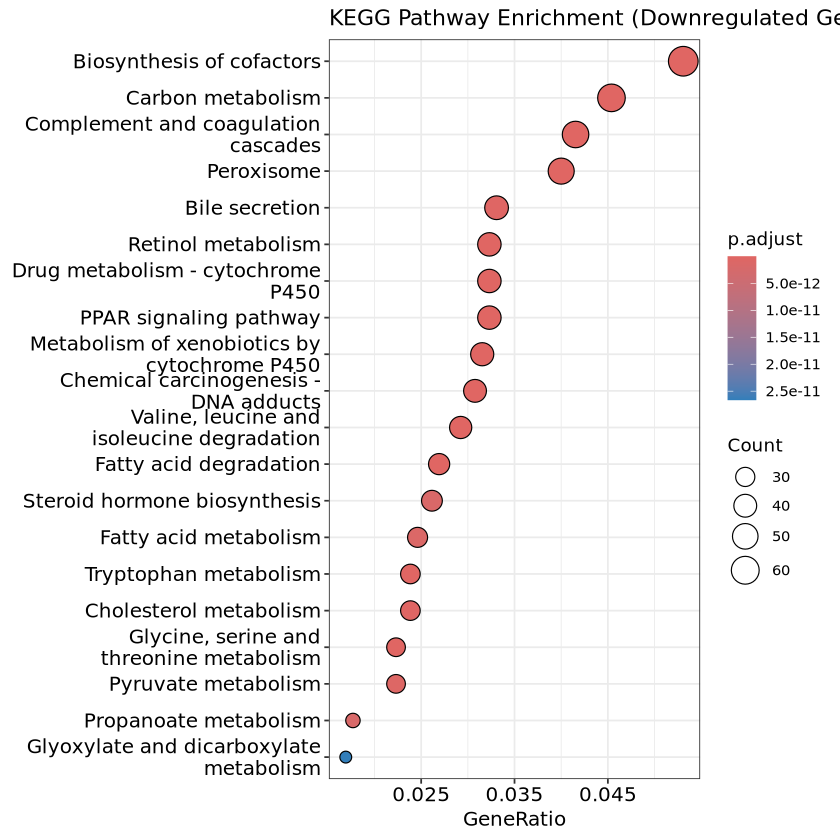

In [9]:
# 1. Load Required Libraries
library(tidyverse)
library(clusterProfiler)
library(org.Hs.eg.db)
library(AnnotationDbi)
library(enrichplot)


# 2. Import DESeq2 Results File
deg <- read.delim("results_DEGs_DESeq2.tsv", header = TRUE, sep = "\t")

# Inspect the first few lines
head(deg)


# 3. Filter for Downregulated Genes
# log2FoldChange < -1  → means >2-fold downregulation
# padj < 0.05          → statistically significant
down_deg <- deg %>%
  filter(log2FoldChange < -1, padj < 0.05)

cat("Number of downregulated genes:", nrow(down_deg), "\n")


# 4. Convert Gene Symbols to ENTREZ IDs
down_deg_annot <- bitr(down_deg$gene_name,
                       fromType = "SYMBOL",
                       toType = "ENTREZID",
                       OrgDb = org.Hs.eg.db)

# Remove duplicates (in case of 1:many mapping)
down_deg_annot <- down_deg_annot %>% distinct(SYMBOL, .keep_all = TRUE)

# Check mapping success rate
cat("Mapping success rate:",
    round(nrow(down_deg_annot) / length(unique(down_deg$gene_name)) * 100, 2),
    "%\n")

# list unmapped gene names
unmapped <- setdiff(down_deg$gene_name, down_deg_annot$SYMBOL)
cat("Number of unmapped genes:", length(unmapped), "\n")


# 5. Perform KEGG Enrichment Analysis (p-value < 0.05)
kegg_enrich <- enrichKEGG(
  gene = down_deg_annot$ENTREZID,
  organism = "hsa",
  pvalueCutoff = 0.05
)

# View the top KEGG pathways
head(as.data.frame(kegg_enrich))


# 6. Draw Dotplot for KEGG Pathways
dotplot(kegg_enrich,
        showCategory = 20,        # Show top 20 pathways
        font.size = 12,
        title = "KEGG Pathway Enrichment (Downregulated Genes)",
        orderBy = "GeneRatio")


# 7. Save Results
write.table(down_deg,
            file = "Downregulated_genes.tsv",
            sep = "\t", quote = FALSE, row.names = FALSE)

write.table(as.data.frame(kegg_enrich),
            file = "KEGG_Enrichment_Downregulated.tsv",
            sep = "\t", quote = FALSE, row.names = FALSE)
